In [1]:
%run PyTorTractor.py

## Testing with John's Code

### {isosinglet_kaon_kbar A1gp_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1u SS_0)}{isosinglet_kaon_kbar A1gp_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1u SD_1)}

In [10]:
# <Corr>{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SS_0]}
# <Corr>{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SS_0]} 
Kaon1Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Kaon2Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'A1gp_1', Hadron1 = Kaon1Sink, Hadron2 = Kaon2Sink, OpNum = 0, strangeness = 0)

#{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SD_1]}</Corr>
#{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SD_1]}</Corr>
Kaon1Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Kaon2Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SD_1')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'A1gp_1', Hadron1 = Kaon1Source, Hadron2 = Kaon2Source, OpNum = 0, strangeness = 0)


hadrons = [Two_Hadron_Sink, Two_Hadron_Source]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128, verbose=True)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []

test0 = PyCorrTorch(SinkTime = 0, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Herz3.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/SingletKKBB.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1gp_1/S=0_000_A1u_000_A1u_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1gp_1/S=0_000_A1u_000_A1u_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
6 tensor contractions to be performed
([((((1, 0), (1, 1)), (0,)), tensor(5.3132-1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0)), (0,)), tensor(5.4851e-06-0.0177j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(3.8891e-06-0.0117j, dtype=torch.complex128)), ((((0, 1), (0,

In [7]:
C_Correct = [0.0003030536314765841-0.9905649426315202j, 0.00022959012179009117-0.7430870270761135j, 0.00024030103503669964-0.7534406716558097j,
            0.00023387462887973758-0.7553526792732299j, 0.0002349955314155697-0.759966813727688j, 0.0002331994875735533-0.7542293948340043j,
            0.00023464647580619913-0.7588340903987991j, 0.00023457897823636606-0.7586335117426631j]
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]-C_Correct[i]}')

C(t_snk= 0, t_src=0) = 0j
C(t_snk= 1, t_src=0) = 0j
C(t_snk= 2, t_src=0) = 0j
C(t_snk= 3, t_src=0) = 0j
C(t_snk= 4, t_src=0) = 0j
C(t_snk= 5, t_src=0) = 0j
C(t_snk= 6, t_src=0) = 0j
C(t_snk= 7, t_src=0) = 0j


In [11]:
res_right_side = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = t, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/SingletKKBB.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res_right_side.append(test0_contracted)

______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
6 tensor contractions to be performed
([((((1, 0), (1, 1)), (0,)), tensor(5.3132-1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0)), (0,)), tensor(5.4851e-06-0.0177j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(3.8891e-06-0.0117j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (2,)), tensor(3.8891e-06-0.0117j, dtype=torch.complex128)), ((((1, 0), (0, 0)), (3,)), tensor(-5.3132+1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (1, 1)), (3,)), tensor(-5.4851e-06+0.0177j, dtype=torch.complex128))], [np.float64(1.9999999999999996), np.float64(-1.9999999999999996), np.float64(-0.9999999999999998), np.float64(0.9999999999999998)])
Correlator_0 = (7.576340786914602e-05-0.24764123565788004j)
______
Diagrams have been su

### {isosinglet_kaon_kbar A1gp_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1u SD_1)}{isosinglet_kaon_kbar A1gp_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1u SS_0)}

In [12]:
# <Corr>{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SS_0]}
# <Corr>{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SS_0]} 
Kaon1Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Kaon2Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SD_1')

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'A1gp_1', Hadron1 = Kaon1Sink, Hadron2 = Kaon2Sink, OpNum = 0, strangeness = 0)

#{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SD_1]}</Corr>
#{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SD_1]}</Corr>
Kaon1Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Kaon2Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'A1gp_1', Hadron1 = Kaon1Source, Hadron2 = Kaon2Source, OpNum = 0, strangeness = 0)


hadrons = [Two_Hadron_Sink, Two_Hadron_Source]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128, verbose=True)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []

test0 = PyCorrTorch(SinkTime = 0, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Herz3.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/SingletKKBB.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1gp_1/S=0_000_A1u_000_A1u_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1gp_1/S=0_000_A1u_000_A1u_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
6 tensor contractions to be performed
([((((1, 0), (1, 1)), (0,)), tensor(5.4851e-06+0.0177j, dtype=torch.complex128)), ((((0, 1), (0, 0)), (0,)), tensor(5.3132-1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(3.8891e-06+0.0117j, dtype=torch.complex128)), ((((0, 1), (0,

In [13]:
C_Correct = [0.00030305351537781796+0.9905649426973008j, -0.0006819386245907665+0.6955200432375263j, 9.707363733499542e-05+0.6750746127058814j,
            -0.0008325600992472169+0.7966332383629519j, 0.0005702759680846392+0.949393476550426j, 0.0006964858205082812+0.9069595874215327j,
            4.3424071342095354e-05+0.9510465716684847j, 0.0011056766247061166+0.718744372924614j]
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]-C_Correct[i]}')

C(t_snk= 0, t_src=0) = 0j
C(t_snk= 1, t_src=0) = 0j
C(t_snk= 2, t_src=0) = 0j
C(t_snk= 3, t_src=0) = 0j
C(t_snk= 4, t_src=0) = 0j
C(t_snk= 5, t_src=0) = 0j
C(t_snk= 6, t_src=0) = 0j
C(t_snk= 7, t_src=0) = 0j


In [14]:
res_left_side = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = t, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/SingletKKBB.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res_left_side.append(test0_contracted)

______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
6 tensor contractions to be performed
([((((1, 0), (1, 1)), (0,)), tensor(5.4851e-06+0.0177j, dtype=torch.complex128)), ((((0, 1), (0, 0)), (0,)), tensor(5.3132-1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(3.8891e-06+0.0117j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (2,)), tensor(3.8891e-06+0.0117j, dtype=torch.complex128)), ((((1, 0), (0, 0)), (3,)), tensor(-5.3132+1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (1, 1)), (3,)), tensor(-5.4851e-06-0.0177j, dtype=torch.complex128))], [np.float64(1.9999999999999996), np.float64(-1.9999999999999996), np.float64(-0.9999999999999998), np.float64(0.9999999999999998)])
Correlator_0 = (7.576337884445449e-05+0.2476412356743252j)
______
Diagrams have been suc

In [20]:
for i in range(8):
    print(f'C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = {i}) = {res_left_side[i]-res_right_side[i].conj()}')

C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 0) = (-1.1609876612601183e-10+6.578060318673806e-11j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 1) = (5.90269824121345e-11+9.123923838671999e-12j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 2) = (8.439274970040503e-10+1.634767876623755e-10j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 3) = (-8.778389822775706e-10+1.0025380525746641e-10j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 4) = (-6.73822033326471e-11-1.5587531265737198e-13j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 5) = (4.254162896521335e-11-1.8816059821347153e-12j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 6) = (-9.028052676168558e-10+5.601519248443765e-12j)
C_SS0_SD1 -C_SD1_SS0* (t_snk = t_src = 7) = (-5.010901416024893e-11+6.242784067467255e-13j)


### Agreed: {isosinglet_kaon_kbar A1p_1 (P=(0,0,0) A1u SS_0) (P=(0,0,1) A2 SS_0)} {isosinglet_kaon_kbar A1p_1 (P=(0,0,0) A1u SS_0) (P=(0,0,1) A2 SS_0)}

In [2]:
#<Corr>  {isosinglet_kaon_kbar A1p_1 [P=(0,0,0) A1u SS_0] [P=(0,0,1) A2 SS_0]}
# {isosinglet_kaon_kbar A1p_1 (P=(0,0,0) A1u SS_0) (P=(0,0,1) A2 SS_0)} 
overall_Group_Sink = 'A1p_1'
K1_Sink_D = 'SS_0'
K2_Sink_D = 'SS_0'

Kaon1Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = K1_Sink_D)

Kaon2Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,1), LGIrrep = 'A2', Displacement = K2_Sink_D)

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,1), LGIrrep = overall_Group_Sink, Hadron1 = Kaon1Sink, Hadron2 = Kaon2Sink, OpNum = 0, strangeness = 0)


#{isosinglet_kaon_kbar A1p_1 [P=(0,0,0) A1u SS_0] [P=(0,0,1) A2 SS_0]}</Corr>

overall_Group_Source = 'A1p_1'
K1_Source_D = 'SS_0'
K2_Source_D = 'SS_0'

Kaon1Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = K1_Source_D)

Kaon2Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,1), LGIrrep = 'A2', Displacement = K2_Source_D)

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,1), LGIrrep = overall_Group_Source, Hadron1 = Kaon1Source, Hadron2 = Kaon2Source, OpNum = 0, strangeness = 0)


hadrons = [Two_Hadron_Sink, Two_Hadron_Source]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128, verbose=True)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res_old = [-8.501002781683127+5.91917500111841e-10j, 0.048129038660646765+0.01322920998099882j,0.003582941848136321+0.0007593832151998142j,
      0.0007177690459509104+0.0008656313030283827j, 7.241890496088926e-05+6.239618694743808e-05j, 7.830051537597468e-05+2.1371960325923867e-05j,
      -8.984523851999366e-07-2.7218472419943665e-05j, -1.7825924493434822e-05-1.6380962400032936e-05j]
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Herz3.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

Path of the two hadron operator: /meson_meson_operators/mom_ray_00+/A1p_1/S=0_000_A1u_00+_A2_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_00+/A1p_1/S=0_000_A1u_00+_A2_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
6 tensor contractions to be performed
([((((1, 0), (1, 1)), (0,)), tensor(0.0009-0.0017j, dtype=torch.complex128)), ((((0, 1), (0, 0)), (0,)), tensor(0.0009+0.0017j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(-0.1629+1.6721e-11j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0)

In [3]:
res_old = [-5.22891374128567+3.329904957809195e-10j, 0.00019653499550432128+2.817835722454618e-05j, 3.1325442107370044e-06+6.294061415815038e-07j,
          9.96999431582431e-08+6.268487257924901e-08j, 2.054315682831334e-07-1.6880791605007606e-07j, -2.067151783615779e-07-3.221457698130866e-08j,
          3.107397629492803e-08+2.377619916426536e-09j, 1.414162555645926e-07+7.229352760239464e-09j]
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res_old[i]-res[i]}')

C(t_snk= 0, t_src=0) = 0j
C(t_snk= 1, t_src=0) = 0j
C(t_snk= 2, t_src=0) = 0j
C(t_snk= 3, t_src=0) = 0j
C(t_snk= 4, t_src=0) = 0j
C(t_snk= 5, t_src=0) = 0j
C(t_snk= 6, t_src=0) = 0j
C(t_snk= 7, t_src=0) = 0j


### Agreed {isosinglet_kaon_kbar A1gp_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1u SS_0)}{isosinglet_kaon_kbar A1gp_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1u SS_0)}

In total there are 4 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 4 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 's', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['d', 's', 'u']
Obtain propagators for the d quarks...


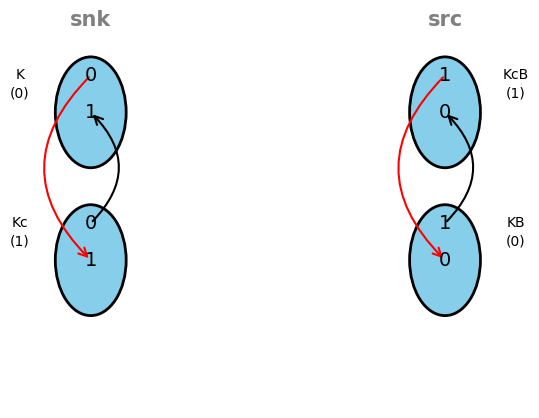

numerical factor =  -1.9999999999999996
Topology: 
[[[1, 0, 1], [1, 1, 0]], [[0, 1, 0], [0, 0, 1]], [[1, 1, 1], [0, 1, 1]], [[0, 0, 0], [1, 0, 0]]]


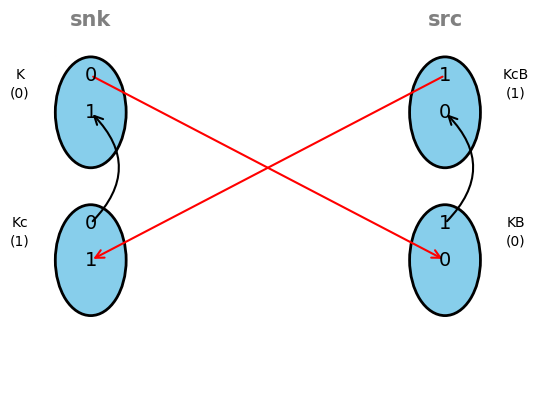

numerical factor =  -0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 1, 0], [1, 1, 0]], [[1, 1, 1], [1, 0, 0]], [[0, 0, 0], [0, 1, 1]]]


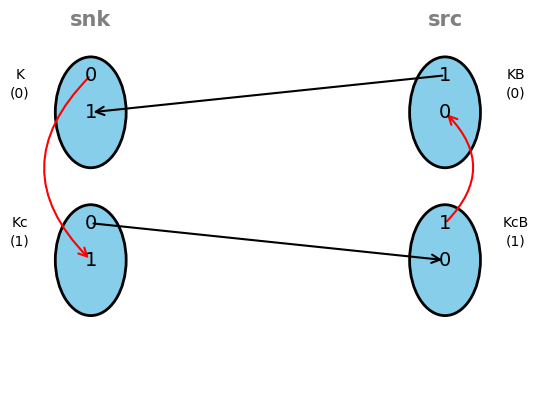

numerical factor =  0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 1, 0], [1, 1, 0]], [[1, 1, 1], [0, 1, 1]], [[0, 0, 0], [1, 0, 0]]]


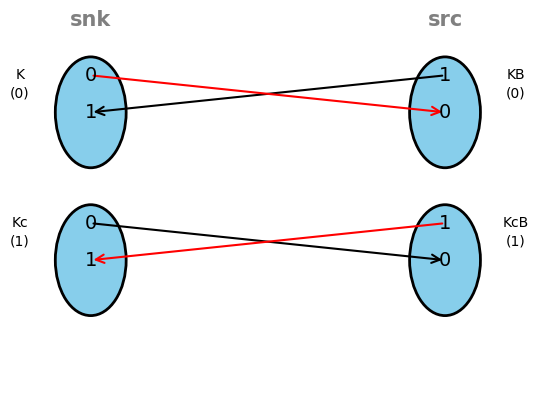

In [2]:
O1         = (Kaon(1/2) * KaonC(-1/2) - Kaon(-1/2) * KaonC(1/2))/(np.sqrt(2))
O1_ontime  = OpTimeSlice(1, O1)
O2         = bar(O1)
O2_ontime  = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result     = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Herz3.hdf5')
for diagram in Result:
    diagram.bulavision()

In [21]:
#<Corr>{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SS_0]}

overall_Group_Sink = 'A1gp_1'
K1_Sink_D = 'SS_0'
K2_Sink_D = 'SS_0'

Kaon1Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = K1_Sink_D)

Kaon2Sink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = K2_Sink_D)

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = overall_Group_Sink, Hadron1 = Kaon1Sink, Hadron2 = Kaon2Sink, OpNum = 0, strangeness = 0)


#{isosinglet_kaon_kbar A1gp_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) A1u SS_0]}</Corr>

overall_Group_Source = 'A1gp_1'
K1_Source_D = 'SS_0'
K2_Source_D = 'SS_0'

Kaon1Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = K1_Source_D)

Kaon2Source = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = K2_Source_D)

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = overall_Group_Source, Hadron1 = Kaon1Source, Hadron2 = Kaon2Source, OpNum = 0, strangeness = 0)


hadrons = [Two_Hadron_Sink, Two_Hadron_Source]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128, verbose=True)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []

for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Herz3.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')
C_Correct = [317.57630092885347-1.4805513723758446e-08j, 225.70765460824865-5.905147820793596e-09j, 226.02948178949086-1.2362634876347183e-09j,
            226.2760982920322+2.1101968342133637e-09j, 227.63487245660107-5.148252471085747e-09j, 225.91314153310398-5.318387287225216e-09j,
            227.29178393118787-5.24455053232671e-09j, 227.23167084929355-5.2745312640024766e-09j]

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1gp_1/S=0_000_A1u_000_A1u_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1gp_1/S=0_000_A1u_000_A1u_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
6 tensor contractions to be performed
([((((1, 0), (1, 1)), (0,)), tensor(5.3132-1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0)), (0,)), tensor(5.3132-1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(1.7658-8.1217e-11j, dtype=torch.complex128)), ((((0, 1), (0,

In [22]:
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i] - C_Correct[i]}')

C(t_snk= 0, t_src=0) = 0j
C(t_snk= 1, t_src=0) = 0j
C(t_snk= 2, t_src=0) = 0j
C(t_snk= 3, t_src=0) = 0j
C(t_snk= 4, t_src=0) = 0j
C(t_snk= 5, t_src=0) = 0j
C(t_snk= 6, t_src=0) = 0j
C(t_snk= 7, t_src=0) = 0j


###  kp->kp

In total there are 9 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u',

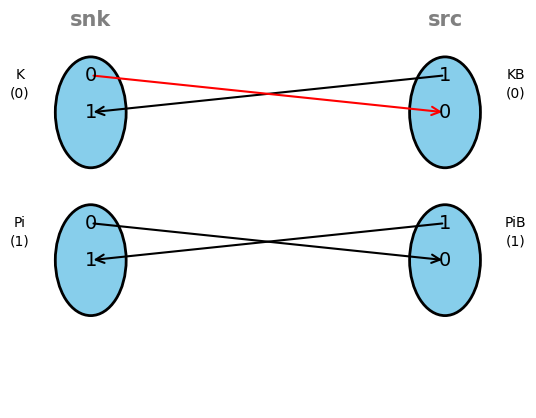

numerical factor =  0.5000000000000001
Topology: 
[[[1, 0, 1], [0, 1, 1]], [[1, 1, 1], [0, 0, 1]], [[0, 1, 0], [1, 1, 0]], [[0, 0, 0], [1, 0, 0]]]


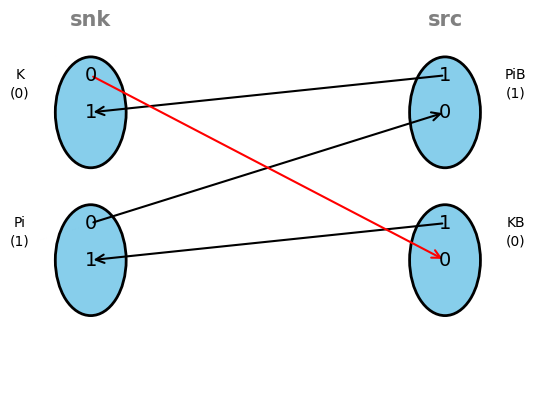

numerical factor =  -1.5000000000000002
Topology: 
[[[1, 0, 1], [1, 1, 0]], [[1, 1, 1], [0, 1, 1]], [[0, 1, 0], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


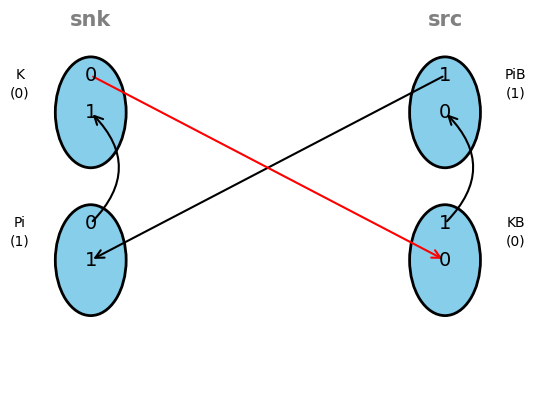

In [2]:
O1 = (Kaon(1/2) * Pion(0) - np.sqrt(2) * Kaon(-1/2) * Pion(1))/(np.sqrt(3))
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/KP_KP_Doublet_New.hdf5')
for diagram in Result:
    diagram.bulavision()

In [23]:
#<Corr>{isodoublet_kaon_pion T1u_3 [P=(0,0,1) A2 SS_1] [P=(0,0,-1) A2m SS_1]}

overall_Group_Sink = 'T1u_3'
K_Sink_D = 'SS_1'
P_Sink_D = 'SS_1'

KaonSink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2', Displacement = K_Sink_D)

PionSink = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = P_Sink_D)



Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = overall_Group_Sink, Hadron1 = KaonSink, Hadron2 = PionSink, OpNum = 0, strangeness = 1)


#{isodoublet_kaon_pion T1u_3 [P=(0,0,1) A2 SS_0] [P=(0,0,-1) A2m SS_1]}</Corr>

overall_Group_Source = 'T1u_3'
K_Source_D = 'SS_0'
P_Source_D = 'SS_1'

KaonSource = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2', Displacement = K_Source_D)

PionSource = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = P_Source_D)



Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = overall_Group_Source, Hadron1 = KaonSource, Hadron2 = PionSource, OpNum = 0, strangeness = 1)

hadrons = [Two_Hadron_Sink, Two_Hadron_Source]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/KP_KP_Doublet.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1u_3/S=1_00+_A2_00-_A2m_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1u_3/S=1_00+_A2_00-_A2m_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 3 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
4 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(0.0161+2.8061e-05j, dtype=torch.complex128)), ((((0, 1), (1, 1)), (0,)), tensor(-0.3968+3.2661e-11j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(5.7799e-05-4.9382e-07j, dtype=torch.complex128)), ((((0, 1), (0

In [24]:
correct_results = [-0.006926200886367124-1.1104954536545342e-05j, 0.00016660285481550664-2.4549040891840983e-07j,
                  2.477298336814142e-05-1.4174725512434576e-06j, 6.672621799351774e-08+5.7137083115146414e-08j,
                  3.726573679872199e-08+2.1088852103782808e-08j, 3.779007969599635e-08+2.3050805020773547e-09j,
                  4.05752419933143e-09-2.01161409285776e-10j, 8.690860974711219e-10+1.2278147642880675e-10j]
for i in range(len(res)):
    print(res[i]-correct_results[i])

0j
0j
0j
0j
0j
0j
0j
0j


### KP->K.

In total there are 3 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['d', 'u', 's']
Obtain propagators for the d quarks...


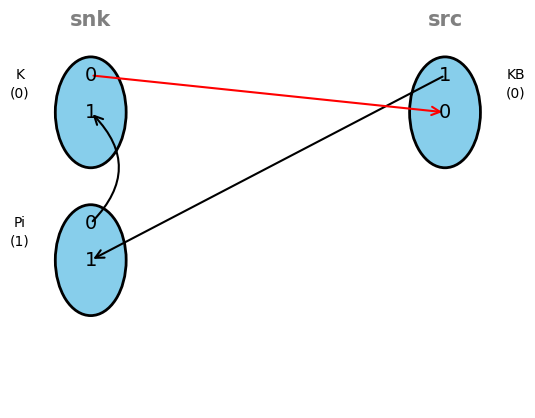

In [38]:
O1 = (Kaon(1/2) * Pion(0) - (2**0.5) * Kaon(-1/2) * Pion(1))/(3**0.5)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(Kaon(1/2))
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/TestTh_03.hdf5')
for diagram in Result:
    diagram.bulavision()

In [25]:
# <Corr>{isodoublet_kaon_pion T1u_3 [P=(0,0,1) A2 SS_0] [P=(0,0,-1) A2m SS_1]} {kaon P=(0,0,0) T1u_3 SS_0}</Corr>
K_Sink_D = 'SS_0'
P_Sink_D = 'SS_1'

K_Source_D = 'SS_0'




hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2', Displacement = K_Sink_D)
hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = P_Sink_D)


hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'T1u_3', Displacement = K_Source_D)



Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1u_3', Hadron1 = hadron1, Hadron2 = hadron2, OpNum = 0, strangeness = 1)





hadrons = [Two_Hadron_Sink, hadron3]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/TestTh_03.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1u_3/S=1_00+_A2_00-_A2m_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((0, 0), (1, 0), (1, 1)), (0,)), tensor(-0.1269-3.7995e-05j, dtype=torch.complex128))], [np.float64(1.2247448713915892)])
Correlator_0 = (-0.15542772005435024-4.653447456283109e-05j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters

In [26]:
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

C(t_snk= 0, t_src=0) = (-0.3115280262457777-0.00011753597518867827j)
C(t_snk= 1, t_src=0) = (-8.9095734805049e-05-2.867401201526373e-07j)
C(t_snk= 2, t_src=0) = (-8.889725828771343e-06-1.2188494519900348e-08j)
C(t_snk= 3, t_src=0) = (-2.1107168104814202e-06+2.6123754762899825e-08j)
C(t_snk= 4, t_src=0) = (-1.4621830259176822e-07-3.4752794693871596e-09j)
C(t_snk= 5, t_src=0) = (-1.302995831228027e-08+3.5610605582408835e-09j)
C(t_snk= 6, t_src=0) = (-4.710938134005819e-09+3.697607767438184e-10j)
C(t_snk= 7, t_src=0) = (-8.413515177672486e-09+2.8495602561701806e-11j)


In [27]:
C_Correct_R = [-0.3115280262457777, -8.9095734805049e-05, -8.889725828771343e-06, -2.1107168104814202e-06, -1.4621830259176822e-07,
               -1.302995831228027e-08, -4.710938134005819e-09, -8.413515177672486e-09]
C_Correct_I = [-0.00011753597518867827, -2.867401201526373e-07, -1.2188494519900348e-08, 2.6123754762899825e-08,
               -3.4752794693871596e-09, 3.5610605582408835e-09, 3.697607767438184e-10, 2.8495602561701806e-11]
#for i in range(len(res)):
#    C_Correct_R.append(res[i].item().real)
#    C_Correct_I.append(res[i].item().imag)
#print(C_Correct_R)
#print(C_Correct_I)
for i in range(len(res)):
    print(res[i].real - C_Correct_R[i], '  ', res[i].imag - C_Correct_I[i])

0.0    0.0
0.0    0.0
0.0    0.0
0.0    0.0
0.0    0.0
0.0    0.0
0.0    0.0
0.0    0.0


In [ ]:
#Hier Beenden

### K->KP.

In total there are 3 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 's', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 's', 'd']
Obtain propagators for the u quarks...


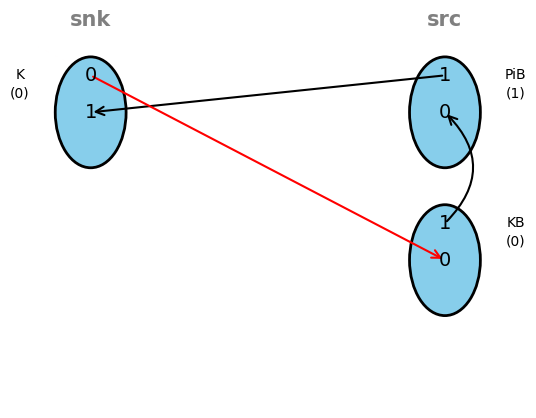

In [2]:
O1 = Kaon(1/2)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar( (Kaon(1/2) * Pion(0) - (2**0.5) * Kaon(-1/2) * Pion(1))/(3**0.5))

O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/TestTh_01.hdf5')
for diagram in Result:
    diagram.bulavision()

In [28]:
# <Corr>{kaon P=(0,0,0) T1u_3 SS_0} {isodoublet_kaon_pion T1u_3 [P=(0,0,1) A2 SS_0] [P=(0,0,-1) A2m SS_1]}</Corr>
#K_Sink_D = 'SS_0'
#K_Source_D = 'SS_0'
#P_Source_D = 'SS_1'



#<Corr>{kaon P=(0,0,0) T1u_3 SS_0} {isodoublet_kaon_pion T1u_3 [P=(0,0,1) A2 SS_1] [P=(0,0,-1) A2m SS_1]}</Corr>
K_Sink_D = 'SS_0'
K_Source_D = 'SS_1'
P_Source_D = 'SS_1'

hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'T1u_3', Displacement = K_Sink_D)

hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2', Displacement = K_Source_D)
hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = P_Source_D)


Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1u_3', Hadron1 = hadron3, Hadron2 = hadron4, OpNum = 0, strangeness = 1)





hadrons = [hadron1, Two_Hadron_Source]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/TestTh_01.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1u_3/S=1_00+_A2_00-_A2m_0
Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((0, 1), (0, 0), (1, 0)), (0,)), tensor(-0.0063+1.9402e-06j, dtype=torch.complex128))], [np.float64(1.2247448713915892)])
Correlator_0 = (-0.007746635786470108+2.37619650359148e-06j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters

In [29]:
Correct_001 = [-0.3115379976421772-0.00011345338774149455j, -8.164843689989596e-05+2.0764018967752726e-06j,
              -1.2173395558980641e-05+7.018394435943155e-07j, -3.6697915817153954e-06+8.295601370466524e-08j,
              -7.008192487681827e-07-5.846757035165485e-09j, -2.637393426280147e-08+1.3180698786244603e-09j,
              -7.852606064896001e-09+4.649337771494858e-10j, -1.5781756347592024e-08+1.4547331362227284e-10j]
Correct_011 = [-0.013753829040436115-1.0202384287617153e-05j, -8.226990824303017e-07+4.312758052081642e-08j,
              -8.187020143704914e-07-1.0762820493528314e-07j, -1.477320097173959e-08-3.0993928980057557e-09j,
              -1.8773068726664265e-08+4.427879844893765e-09j, -1.8309484800092928e-11-3.138702234717326e-10j,
              1.1601299447272747e-09+6.579975721413174e-10j, 1.7836904729872594e-10+2.5455223709267626e-10j]
for i in range(len(res)):
    #print(f'C(t_snk= {i}, t_src=0) = {res[i]}')
    print(f'diff = {res[i]-Correct_011[i]}')

diff = 0j
diff = 0j
diff = 0j
diff = 0j
diff = 0j
diff = 0j
diff = 0j
diff = 0j


### {pion P=(0,0,0) T1up_3 SS_0} {isotriplet_pion_pion T1up_3 (P=(0,0,1) A2m SS_1) (P=(0,0,-1) A2m SS_1)}

In total there are 4 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Mult

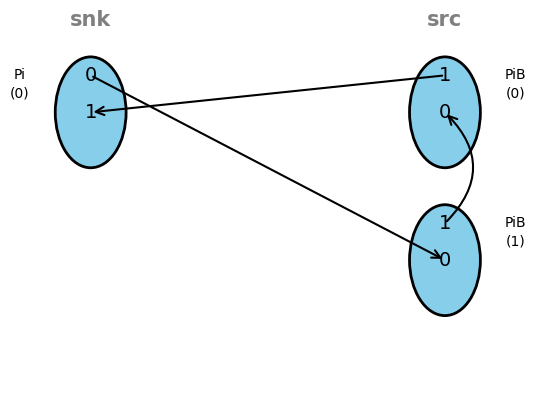

numerical factor =  -0.9999999999999999
Topology: 
[[[1, 0, 1], [0, 1, 1]], [[0, 1, 0], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


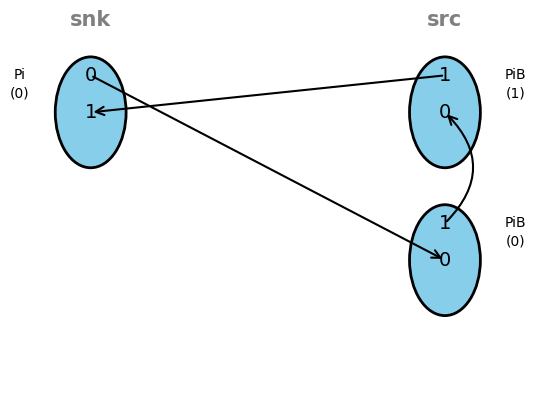

In [7]:
O1 = Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = TwoHadronAnnihilation(rep=(1,1), I=1, I3=1, A=Pion, B=Pion)
O2 = bar(O2)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/P_Isotriplet_PP_New.hdf5')
for diagram in Result:
    diagram.bulavision()

In [30]:
#<Corr>{pion P=(0,0,0) T1up_3 SS_0}
#{isotriplet_pion_pion T1up_3 [P=(0,0,1) A2m SS_1] [P=(0,0,-1) A2m SS_1]}</Corr>
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'T1up_3', Displacement = 'SS_0')

hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m', Displacement = 'SS_1')
hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = 'SS_1')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1up_3', Hadron1 = hadron2, Hadron2 = hadron3, OpNum = 0, strangeness = 0)
hadrons = [Hadron1, Two_Hadron_Source]

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1up_3/S=0_00+_A2m_00-_A2m_0


In [31]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/P_Isotriplet_PP_New.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
2 tensor contractions to be performed
([((((0, 1), (0, 0), (1, 0)), (0,)), tensor(0.0046-8.4429e-13j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0)), (1,)), tensor(-0.0039+4.8588e-13j, dtype=torch.complex128))], [np.float64(0.9999999999999999), np.float64(-0.9999999999999999)])
Correlator_0 = (0.008529698107164606-1.3301698508123587e-12j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now 

In [32]:
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

C(t_snk= 0, t_src=0) = (0.01705939621432921-2.6603397842104298e-12j)
C(t_snk= 1, t_src=0) = (0.001469682593143524-2.08555790740222e-13j)
C(t_snk= 2, t_src=0) = (0.00012465409755524722-4.782099199240265e-13j)
C(t_snk= 3, t_src=0) = (1.037339132046892e-05-8.273672872987712e-14j)
C(t_snk= 4, t_src=0) = (4.539616641457901e-07-7.547742713575824e-15j)
C(t_snk= 5, t_src=0) = (3.658885046922377e-08-7.732876921753064e-15j)
C(t_snk= 6, t_src=0) = (4.7557381425989245e-09-4.927950735107986e-15j)
C(t_snk= 7, t_src=0) = (5.830128321273886e-10-1.5753736923492618e-15j)


In [33]:
correct_results = [-0.01705939621432921+2.6603397858967667e-12j, -0.0014696825931435242+2.0855574313806832e-13j,
                    -0.00012465409755524717+4.782099150045087e-13j, -1.0373391320468922e-05+8.273672765877032e-14j,
                    -4.5396166414579006e-07+7.547742714231752e-15j, -3.658885046922376e-08+7.732876916739392e-15j,
                    -4.755738142598925e-09+4.927950734076989e-15j, -5.830128321273885e-10+1.575373692106411e-15j]

for i in range(len(res)):
    tst = res[i]+correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

True
True
True
True
True
True
True
True


### {isoquartet_kaon_pion A1g_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1um SS_0)} {isoquartet_kaon_pion A1g_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1um SS_0)

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 's', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
**********************************************
 
 
********
0 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  1
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[1, 1, 1], [0, 1, 1]], [[0, 0, 0], [1, 0, 0]], [[0, 1, 0], [1, 1, 0]]]


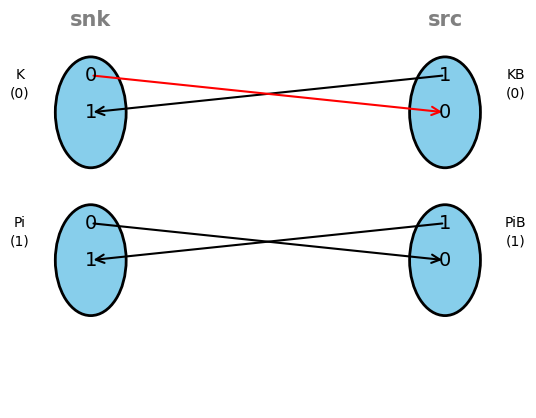

numerical factor =  -1
Topology: 
[[[1, 0, 1], [0, 1, 1]], [[1, 1, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]], [[0, 1, 0], [1, 1, 0]]]


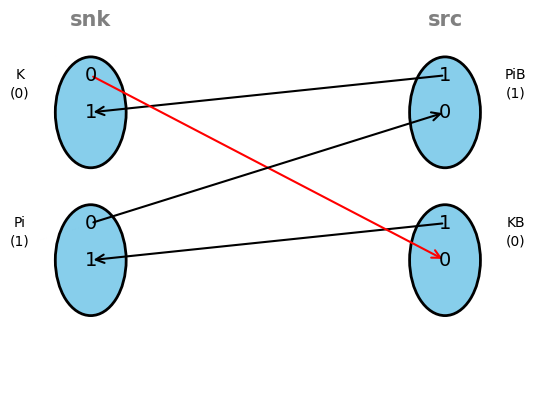

In [5]:
O1 = Kaon(1/2) * Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Isoquartet_kp_kp.hdf5')
for diagram in Result:
    diagram.bulavision()

In [12]:
#{isoquartet_kaon_pion A1g_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1um SS_0)}
#{isoquartet_kaon_pion A1g_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) A1um SS_0)
hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um', Displacement = 'SS_0')

hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um', Displacement = 'SS_0')

hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'A1g_1', Hadron1 = hadron2, Hadron2 = hadron1, OpNum = 0, strangeness = 1)

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'A1g_1', Hadron1 = hadron4, Hadron2 = hadron3, OpNum = 0, strangeness = 1)
hadrons = [Two_Hadron_Sink, Two_Hadron_Source]

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1g_1/S=1_000_A1u_000_A1um_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_000/A1g_1/S=1_000_A1u_000_A1um_0


In [13]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Isoquartet_kp_kp.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 3 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
3 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-5.3132+1.2375e-10j, dtype=torch.complex128)), ((((0, 1), (1, 1)), (0,)), tensor(-4.2801+2.0336e-10j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (1,)), tensor(1.4226-9.9323e-11j, dtype=torch.complex128))], [np.int64(1), np.int64(-1)])
Correlator_0 = (21.318803034181443-1.5108293924085132e-09j)
______
Diagrams have been successfully clustered! There are 3 clusters
All combinations of hadron structures coeffic

In [14]:
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

C(t_snk= 0, t_src=0) = (21.318803034181443-1.5108293924085132e-09j)
C(t_snk= 1, t_src=0) = (0.05351444945823623-4.545121825367166e-06j)
C(t_snk= 2, t_src=0) = (0.0005498503231387984+1.3977208279998974e-07j)
C(t_snk= 3, t_src=0) = (7.2466246077680245e-06-1.0060250590859538e-10j)
C(t_snk= 4, t_src=0) = (9.51895770661978e-08-4.6030702788864397e-10j)
C(t_snk= 5, t_src=0) = (1.005133923025637e-09-6.795685476003659e-12j)
C(t_snk= 6, t_src=0) = (2.044031686822497e-11-3.2509038838690615e-13j)
C(t_snk= 7, t_src=0) = (4.287702244124225e-13+9.188989922362505e-16j)


In [17]:
C_Correct = [21.318803034181443-1.5108293924085132e-09j, 0.05351444945823623-4.545121825367166e-06j, 0.0005498503231387984+1.3977208279998974e-07j,
            7.2466246077680245e-06-1.0060250590859538e-10j, 9.51895770661978e-08-4.6030702788864397e-10j, 1.005133923025637e-09-6.795685476003659e-12j,
            2.044031686822497e-11-3.2509038838690615e-13j, 4.287702244124225e-13+9.188989922362505e-16j]
for i in range(len(res)):
    tst = res[i]-C_Correct[i]
    if np.abs(tst) >= 1e-13:
        print(False)
    else:
        print(True)

#correct_results = [-0.01705939621432921+2.6603397858967667e-12j, -0.0014696825931435242+2.0855574313806832e-13j,
#                    -0.00012465409755524717+4.782099150045087e-13j, -1.0373391320468922e-05+8.273672765877032e-14j,
#                    -4.5396166414579006e-07+7.547742714231752e-15j, -3.658885046922376e-08+7.732876916739392e-15j,
#                    -4.755738142598925e-09+4.927950734076989e-15j, -5.830128321273885e-10+1.575373692106411e-15j]

#for i in range(len(res)):
#    tst = res[i]+correct_results[i]
#    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
#        print(False)
#        print()
#    else:
#        print(True)

True
True
True
True
True
True
True
True


### {lambda P=(0,0,0) G1u_1 SS_0} {isosinglet_kbar_nucleon G1u_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) G1g SS_0)}

In total there are 2 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
**********************************************
Now add all diagrams of differe

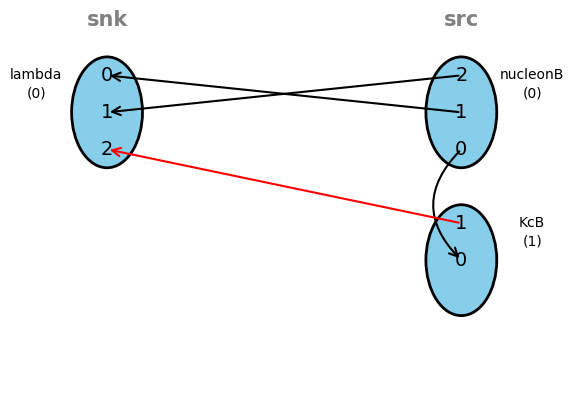

In [2]:
#I = 0, I_3 = 0
O1 = Lambda()
O1_ontime = OpTimeSlice(1, O1)
O2 = (bar(Nucleon(1/2)) * bar(KaonC(-1/2)) - bar(Nucleon(-1/2)) * bar(KaonC(1/2)))/(2**(1/2))
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Singlet_L_KN_New.hdf5')
for diagram in Result:
    diagram.bulavision()

In [18]:
#<Corr>{lambda P=(0,0,0) G1u_1 SS_0} {isosinglet_kbar_nucleon G1u_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) G1g SS_0]}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,0), LGIrrep = 'G1u_1', Displacement = 'SS_0', dlen='dlen0')


hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')
hadron3 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g', Displacement = 'SS_0', dlen='dlen0')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_baryon_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'G1u_1', Hadron1 = hadron2, Hadron2 = hadron3, OpNum = 0, strangeness = 1)

hadrons = [Hadron1, Two_Hadron_Source]

Path of the two hadron operator: /meson_baryon_operators/mom_ray_000/G1u_1/000_A1u_000_G1g_0


In [19]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Singlet_L_KN_New.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((0, 1), (0, 0), (1, 0)), (0,)), tensor(6.5633e-08-1.3919e-11j, dtype=torch.complex128))], [np.float64(-2.82842712474619)])
Correlator_0 = (-1.856391565854298e-07+3.936838006505238e-11j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((0, 1),

In [20]:
for i in range(len(res)):
    print(f'C(t_sin={i}, t_src = 0) = {res[i]}')

C(t_sin=0, t_src = 0) = (-1.856391565854298e-07+3.936838006505238e-11j)
C(t_sin=1, t_src = 0) = (4.967969922867994e-11+4.02260741273559e-11j)
C(t_sin=2, t_src = 0) = (4.073361587451076e-12-2.84491472224807e-12j)
C(t_sin=3, t_src = 0) = (3.320861996870726e-14+1.0772044017941923e-14j)
C(t_sin=4, t_src = 0) = (5.3586014368057094e-15-6.6442657672558726e-15j)
C(t_sin=5, t_src = 0) = (4.7342357348904615e-16+1.2237583111053118e-16j)
C(t_sin=6, t_src = 0) = (4.9950975578365465e-17-9.403776405933943e-18j)


In [21]:
correct_results = [-1.856391565854298e-07+3.936838006505238e-11j, 4.967969922867994e-11+4.02260741273559e-11j,
                  4.073361587451076e-12-2.84491472224807e-12j, 3.320861996870726e-14+1.0772044017941923e-14j,
                  5.3586014368057094e-15-6.6442657672558726e-15j, 4.7342357348904615e-16+1.2237583111053118e-16j,
                  4.9950975578365465e-17-9.403776405933943e-18j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst =correct_results[i] - res[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
        print(tst)
    else:
        print(True)

0j
0j
0j
0j
0j
0j
0j
True
True
True
True
True
True
True


### {isosinglet_kbar_nucleon G1u_1 (P=(0,0,0) A1u SS_0) (P=(0,0,0) G1g SS_0)} {lambda P=(0,0,0) G1u_1 SS_0}

In total there are 2 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['s', 'u', 'd']
Obtain propagators for the s quarks...
Done.
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['s', 'd', 'u']
Obtain propagators for the s quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the u quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
**********************************************
Now add all diagrams of differe

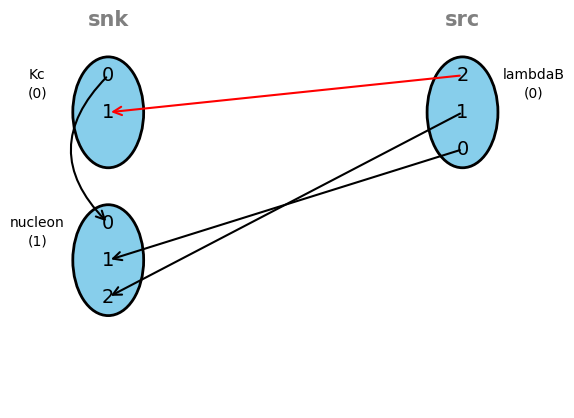

In [4]:
#I = 0, I_3 = 0
O1 = ( KaonC(-1/2) * Nucleon(1/2) - KaonC(1/2) * Nucleon(-1/2) )/(2**(1/2))
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(Lambda())
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Singlet_KN_L_New.hdf5')
for diagram in Result:
    diagram.bulavision()

In [22]:
#<Corr>{isosinglet_kbar_nucleon G1u_1 [P=(0,0,0) A1u SS_0] [P=(0,0,0) G1g SS_0]}{lambda P=(0,0,0) G1u_1 SS_0}</Corr>

hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'antikaon_ds',
          Momentum = (0,0,0), LGIrrep = 'A1u', Displacement = 'SS_0')

hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,1), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g', Displacement = 'SS_0', dlen='dlen0')

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_baryon_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'G1u_1', Hadron1 = hadron1, Hadron2 = hadron2, OpNum = 0, strangeness = 1)

Hadron3 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,0), LGIrrep = 'G1u_1', Displacement = 'SS_0', dlen='dlen0')


hadrons = [Hadron3, Two_Hadron_Sink]

Path of the two hadron operator: /meson_baryon_operators/mom_ray_000/G1u_1/000_A1u_000_G1g_0


In [23]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Singlet_KN_L_New.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((0, 0), (1, 0), (1, 1)), (0,)), tensor(8.6728e-08-3.7598e-11j, dtype=torch.complex128))], [np.float64(-2.82842712474619)])
Correlator_0 = (-2.453046536078498e-07+1.0634277331752387e-10j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((0, 0)

In [24]:
for i in range(len(res)):
    print(f'C(t_sin={i}, t_src = 0) = {res[i]}')

C(t_sin=0, t_src = 0) = (-2.453046536078498e-07+1.0634277331752387e-10j)
C(t_sin=1, t_src = 0) = (6.55940959493042e-11+6.320193329386688e-11j)
C(t_sin=2, t_src = 0) = (2.57574978700462e-12+1.458520635202231e-14j)
C(t_sin=3, t_src = 0) = (9.869719463404791e-14-6.320492716406146e-14j)
C(t_sin=4, t_src = 0) = (3.1185324659684934e-15+3.9281264505992014e-15j)
C(t_sin=5, t_src = 0) = (-4.623503477066217e-16-3.3071543492267715e-16j)
C(t_sin=6, t_src = 0) = (-5.720905245139752e-17-3.387437491360553e-17j)


In [25]:
correct_results = [-2.453046536078498e-07+1.0634277331752387e-10j, 6.55940959493042e-11+6.320193329386688e-11j,
      2.57574978700462e-12+1.458520635202231e-14j, 9.869719463404791e-14-6.320492716406146e-14j,
      3.1185324659684934e-15+3.9281264505992014e-15j, -4.623503477066217e-16-3.3071543492267715e-16j,
      -5.720905245139752e-17-3.387437491360553e-17j]

for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst =correct_results[i] - res[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
        print(tst)
    else:
        print(True)

0j
0j
0j
0j
0j
0j
0j
True
True
True
True
True
True
True


### {isotriplet_pion_pion T1up_3 (P=(0,0,1) A2m SS_1) (P=(0,0,-1) A2m SS_1)} {isotriplet_pion_pion T1up_3 (P=(0,0,1) A2m SS_1) (P=(0,0,-1) A2m SS_1)}

In total there are 16 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 6 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 4 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Mul

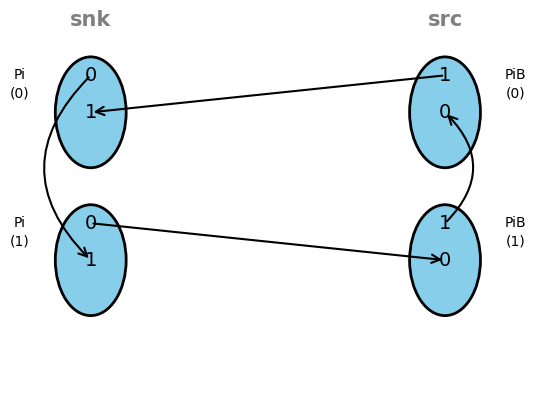

-0.9999999999999998
numerical factor =  0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[1, 1, 1], [0, 1, 1]], [[0, 0, 0], [1, 0, 0]], [[0, 1, 0], [1, 1, 0]]]


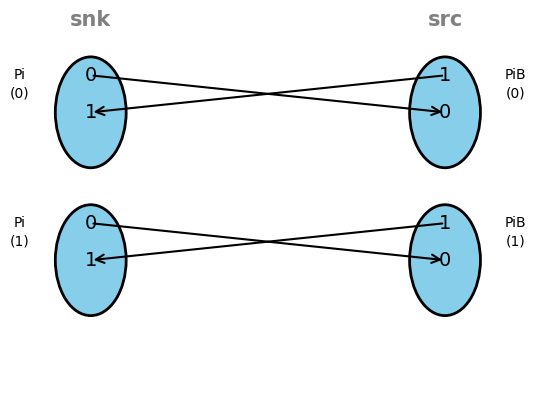

0.9999999999999998
numerical factor =  0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 1, 1]], [[0, 1, 0], [0, 0, 1]], [[1, 1, 1], [1, 0, 0]], [[0, 0, 0], [1, 1, 0]]]


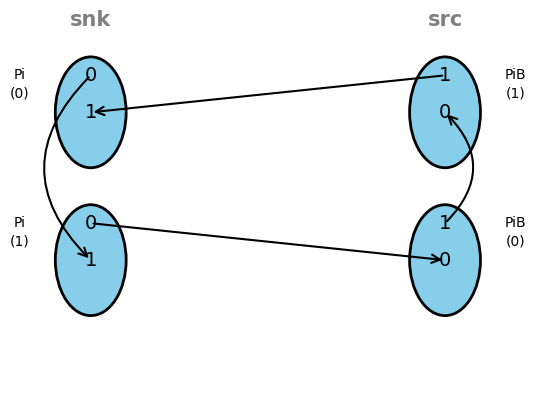

0.9999999999999998
numerical factor =  -0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 1, 1]], [[1, 1, 1], [0, 0, 1]], [[0, 0, 0], [1, 1, 0]], [[0, 1, 0], [1, 0, 0]]]


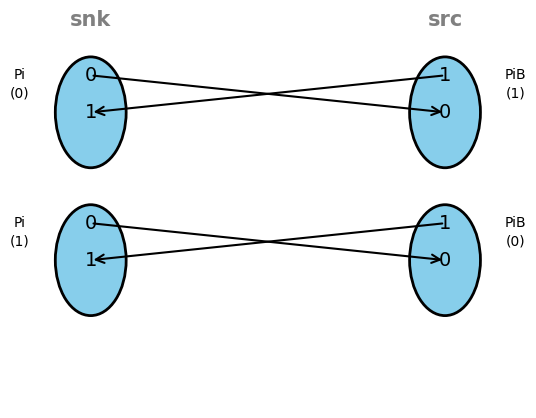

-0.9999999999999998
numerical factor =  0.9999999999999998
Topology: 
[[[1, 0, 1], [1, 1, 0]], [[1, 1, 1], [0, 0, 1]], [[0, 0, 0], [0, 1, 1]], [[0, 1, 0], [1, 0, 0]]]


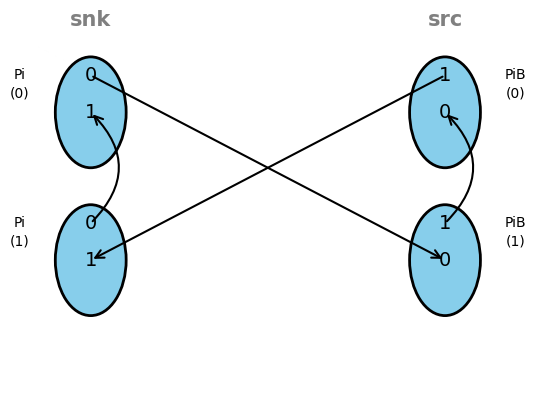

0.9999999999999998
numerical factor =  -0.9999999999999998
Topology: 
[[[1, 0, 1], [1, 1, 0]], [[1, 1, 1], [0, 1, 1]], [[0, 1, 0], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


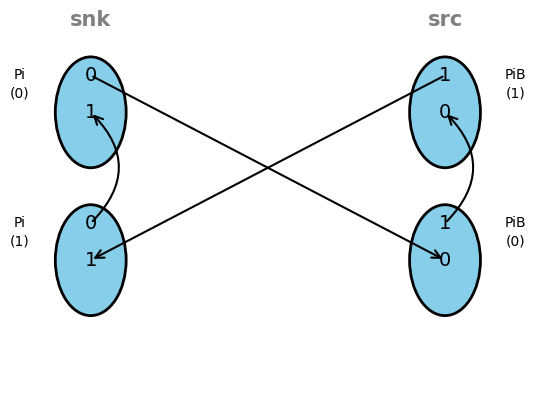

-0.9999999999999998


In [14]:
O1 = (Pion(0) * Pion(1) - Pion(1) * Pion(0))/(2**(0.5))
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Isotriplet_pp_pp.hdf5')
print(Result)
for diagram in Result:
    diagram.bulavision()
    print(diagram.gff())

In [26]:
#{isotriplet_pion_pion T1up_3 [P=(0,0,1) A2m SS_1] [P=(0,0,-1) A2m SS_1]}
#{isotriplet_pion_pion T1up_3 [P=(0,0,1) A2m SS_1] [P=(0,0,-1) A2m SS_1]}</Corr>

hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m', Displacement = 'SS_1')

hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = 'SS_1')

Two_Hadron_Sink = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1up_3', Hadron1 = hadron1, Hadron2 = hadron2, OpNum = 0, strangeness = 0)



hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m', Displacement = 'SS_1')

hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = 'SS_1')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1up_3', Hadron1 = hadron3, Hadron2 = hadron4, OpNum = 0, strangeness = 0)

hadrons = [Two_Hadron_Sink, Two_Hadron_Source]

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1up_3/S=0_00+_A2m_00-_A2m_0
Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1up_3/S=0_00+_A2m_00-_A2m_0


In [35]:
with h5py.File('M_Tests/meson_operators.h5', 'r') as yns0:
    yns = yns0['meson_operators']['isovector_du']['mom_ray_000']
    for i in yns:
        print(i)

A1gm_1
A1gp_1
A1um_1
A1up_1
A2gm_1
A2gp_1
A2um_1
A2up_1
Egm_1
Egm_2
Egp_1
Egp_2
Eum_1
Eum_2
Eup_1
Eup_2
T1gm_1
T1gm_2
T1gm_3
T1gp_1
T1gp_2
T1gp_3
T1um_1
T1um_2
T1um_3
T1up_1
T1up_2
T1up_3
T2gm_1
T2gm_2
T2gm_3
T2gp_1
T2gp_2
T2gp_3
T2um_1
T2um_2
T2um_3
T2up_1
T2up_2
T2up_3


In [27]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Isotriplet_pp_pp.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 5 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
8 tensor contractions to be performed
([((((0, 1), (0, 0), (1, 0), (1, 1)), (0,)), tensor(0.0190-4.2381e-12j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (2,)), tensor(0.0071-1.7530e-12j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (4,)), tensor(0.0071-1.7530e-12j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0), (1, 1)), (5,)), tensor(0.0190-4.2381e-12j, dtype=torch.complex128)), ((((1, 0), (0, 0)), (1,)), tensor(-0.3968+3.2661e-11j, dtype=torch.complex128)),

In [28]:
for i in range(len(res)):
    print(f'C(t_sin={i}, t_src = 0) = {res[i]}')

C(t_sin=0, t_src = 0) = (0.5016497816120746-9.268956389357396e-11j)
C(t_sin=1, t_src = 0) = (-6.469027564321331e-05-3.9866657853468165e-13j)
C(t_sin=2, t_src = 0) = (9.62763449787062e-07+3.5685344559645596e-15j)
C(t_sin=3, t_src = 0) = (1.5912905743209582e-07+3.9826124434250074e-15j)
C(t_sin=4, t_src = 0) = (1.029310126361129e-08+8.660584016016557e-16j)
C(t_sin=5, t_src = 0) = (1.9615588503976824e-09+2.813688785445631e-17j)
C(t_sin=6, t_src = 0) = (-1.3250172425844278e-10+3.9202474857141445e-16j)


In [29]:
correct_results = [0.5016497816120745-9.268956389357396e-11j,-6.469027564321331e-05-3.9866657853468165e-13j,
                 9.62763449787062e-07+3.5685344559645596e-15j, 1.5912905743209582e-07+3.9826124434250074e-15j,
                 1.029310126361129e-08+8.660584016016557e-16j, 1.9615588503976824e-09+2.813688785445631e-17j,
                 -1.3250172425844278e-10+3.9202474857141445e-16j, 1.0652951097991211e-10+2.1292838959178803e-16j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(-1.1102230246251565e-16+0j)
0j
0j
0j
0j
0j
0j
True
True
True
True
True
True
True


### pion P=(0,0,0) T1up_3 SS_0} {isotriplet_pion_pion T1up_3 (P=(0,0,1) A2m SS_1) (P=(0,0,-1) A2m SS_1])

In total there are 4 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Mult

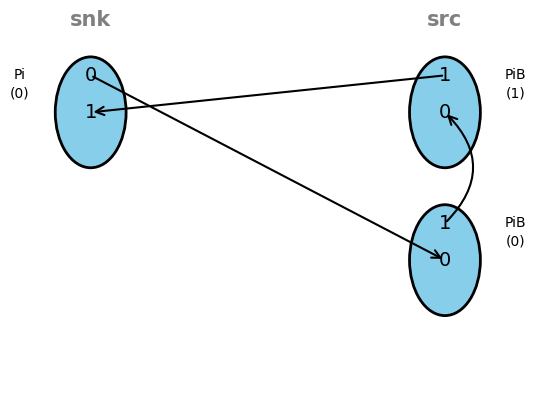

numerical factor =  -0.9999999999999999
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [0, 1, 1]], [[0, 1, 0], [1, 0, 0]]]


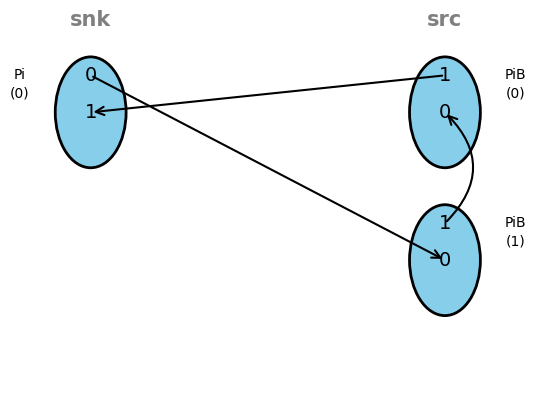

In [2]:
O1 = Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(Pion(1) * Pion(0) - Pion(0) * Pion(1)) / (2**0.5)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Pi+_S_Pi+Pi0.hdf5')
for diagram in Result:
    diagram.bulavision()

In [30]:
#<Corr>{pion P=(0,0,0) T1up_3 SS_0} {isotriplet_pion_pion T1up_3 [P=(0,0,1) A2m SS_1] [P=(0,0,-1) A2m SS_1]}</Corr>
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'T1up_3', Displacement = 'SS_0')

hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m', Displacement = 'SS_1')
hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = 'SS_1')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1up_3', Hadron1 = hadron2, Hadron2 = hadron3, OpNum = 0, strangeness = 0)
hadrons = [Hadron1, Two_Hadron_Source]

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1up_3/S=0_00+_A2m_00-_A2m_0


In [31]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+_S_Pi+Pi0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
2 tensor contractions to be performed
([((((0, 1), (0, 0), (1, 0)), (0,)), tensor(0.0046-8.4429e-13j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0)), (1,)), tensor(-0.0039+4.8588e-13j, dtype=torch.complex128))], [np.float64(0.9999999999999999), np.float64(-0.9999999999999999)])
Correlator_0 = (0.008529698107164606-1.3301698508123587e-12j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now 

In [32]:
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

C(t_snk= 0, t_src=0) = (0.01705939621432921-2.6603397842104298e-12j)
C(t_snk= 1, t_src=0) = (0.001469682593143524-2.08555790740222e-13j)
C(t_snk= 2, t_src=0) = (0.00012465409755524722-4.782099199240265e-13j)
C(t_snk= 3, t_src=0) = (1.037339132046892e-05-8.273672872987712e-14j)
C(t_snk= 4, t_src=0) = (4.539616641457901e-07-7.547742713575824e-15j)
C(t_snk= 5, t_src=0) = (3.658885046922377e-08-7.732876921753064e-15j)
C(t_snk= 6, t_src=0) = (4.7557381425989245e-09-4.927950735107986e-15j)
C(t_snk= 7, t_src=0) = (5.830128321273886e-10-1.5753736923492618e-15j)


In [33]:
correct_results = [-0.01705939621432921+2.6603397858967667e-12j, -0.0014696825931435242+2.0855574313806832e-13j,
                    -0.00012465409755524717+4.782099150045087e-13j, -1.0373391320468922e-05+8.273672765877032e-14j,
                    -4.5396166414579006e-07+7.547742714231752e-15j, -3.658885046922376e-08+7.732876916739392e-15j,
                    -4.755738142598925e-09+4.927950734076989e-15j, -5.830128321273885e-10+1.575373692106411e-15j]
for i in range(len(res)):
    print(correct_results[i] + res[i])

for i in range(len(res)):
    tst = res[i]+correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

1.6863369256600583e-21j
(-2.168404344971009e-19-4.7602153682675486e-20j)
(5.421010862427522e-20-4.919517752665617e-21j)
(-1.6940658945086007e-21-1.071106804789539e-21j)
(5.293955920339377e-23+6.559283763604087e-25j)
(1.3234889800848443e-23-5.013671747448179e-24j)
(-8.271806125530277e-25-1.03099702691317e-24j)
(1.0339757656912846e-25-2.428508296722885e-25j)
True
True
True
True
True
True
True
True


###

### pion P=(0,0,0) T1up_3 SS_0} {isotriplet_pion_pion T1up_3 (P=(0,0,1) A2m SS_1) (P=(0,0,-1) A2m SS_1])

In total there are 4 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Mult

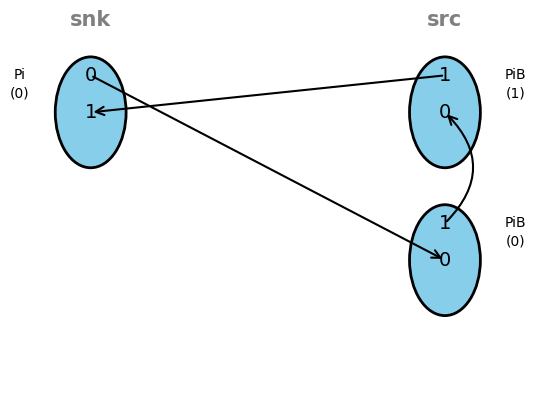

numerical factor =  -0.9999999999999999
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [0, 1, 1]], [[0, 1, 0], [1, 0, 0]]]


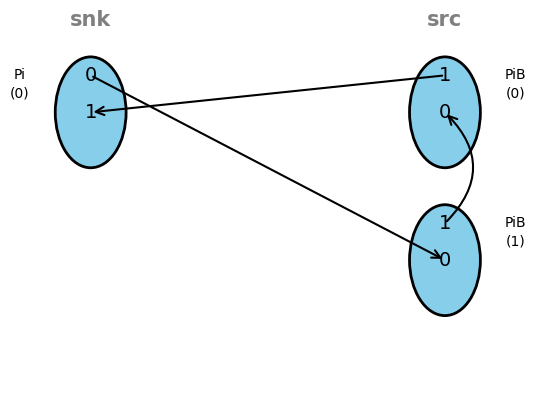

In [48]:
O1 = Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(Pion(0) * Pion(1) - Pion(1) * Pion(0)) / (2**0.5)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/P_Isotriplet_PP.hdf5')
for diagram in Result:
    diagram.bulavision()

In [49]:
#<Corr>{pion P=(0,0,0) T1up_3 SS_0} {isotriplet_pion_pion T1up_3 [P=(0,0,1) A2m SS_1] [P=(0,0,-1) A2m SS_1]}</Corr>
#<Corr>{pion P=(0,0,0) T1up_3 SS_0} {isotriplet_pion_pion T1up_3 [P=(0,0,1) A2m SS_1] [P=(0,0,-1) A2m SS_1]}</Corr>

Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'T1up_3', Displacement = 'SS_0')

hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m', Displacement = 'SS_1')
hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,1), Flavor = 'isovector_du',
          Momentum = (0,0,-1), LGIrrep = 'A2m', Displacement = 'SS_1')

Two_Hadron_Source = TwoHadron(File_Info_Path = 'multihadron/meson_meson_operators.h5',
          Total_Momentum = (0,0,0), LGIrrep = 'T1up_3', Hadron1 = hadron2, Hadron2 = hadron3, OpNum = 0, strangeness = 0)
hadrons = [Hadron1, Two_Hadron_Source]

Path of the two hadron operator: /meson_meson_operators/mom_ray_000/T1up_3/S=0_00+_A2m_00-_A2m_0


In [50]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)

perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(8):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/P_Isotriplet_PP.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
2 tensor contractions to be performed
([((((0, 1), (0, 0), (1, 0)), (0,)), tensor(-0.0039+4.8588e-13j, dtype=torch.complex128)), ((((0, 1), (0, 0), (1, 0)), (1,)), tensor(0.0046-8.4429e-13j, dtype=torch.complex128))], [np.float64(0.9999999999999999), np.float64(-0.9999999999999999)])
Correlator_0 = (-0.008529698107164606+1.330169877917413e-12j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now 

In [51]:
for i in range(len(res)):
    print(f'C(t_snk= {i}, t_src=0) = {res[i]}')

C(t_snk= 0, t_src=0) = (-0.01705939621432921+2.6603398511260326e-12j)
C(t_snk= 1, t_src=0) = (-0.0014696825931435238+2.0855578976084015e-13j)
C(t_snk= 2, t_src=0) = (-0.00012465409755524722+4.782099194972013e-13j)
C(t_snk= 3, t_src=0) = (-1.037339132046892e-05+8.273672895652461e-14j)
C(t_snk= 4, t_src=0) = (-4.539616641457901e-07+7.547742725156352e-15j)
C(t_snk= 5, t_src=0) = (-3.6588850469223764e-08+7.732876918573588e-15j)
C(t_snk= 6, t_src=0) = (-4.755738142598925e-09+4.92795073473317e-15j)
C(t_snk= 7, t_src=0) = (-5.830128321273884e-10+1.5753736924413503e-15j)


In [54]:
correct_results = [0.01705939621432921-2.6603397842104298e-12j, 0.001469682593143524-2.08555790740222e-13j, 0.00012465409755524722-4.782099199240265e-13j,
                  1.037339132046892e-05-8.273672872987712e-14j, 4.539616641457901e-07-7.547742713575824e-15j, 3.658885046922377e-08-7.732876921753064e-15j,
                  4.7557381425989245e-09-4.927950735107986e-15j, 5.830128321273886e-10-1.5753736923492618e-15j]
for i in range(len(res)):
    print(correct_results[i] + res[i])

for i in range(len(res)):
    tst = res[i]+correct_results[i]
    if np.abs(tst.imag) >= 1e-14 or np.abs(tst.real) >= 1e-14:
        print(False)
    else:
        print(True)

6.691560283308973e-20j
(2.168404344971009e-19-9.793818452627848e-22j)
-4.268251960773623e-22j
2.266474878395296e-22j
1.1580528575742387e-23j
(6.617444900424222e-24-3.1794754795007e-24j)
(-8.271806125530277e-25-3.7481621506309067e-25j)
(2.0679515313825692e-25+9.208846663188003e-26j)
True
True
True
True
True
True
True
True


### Kaon (I)

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
0 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -1
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


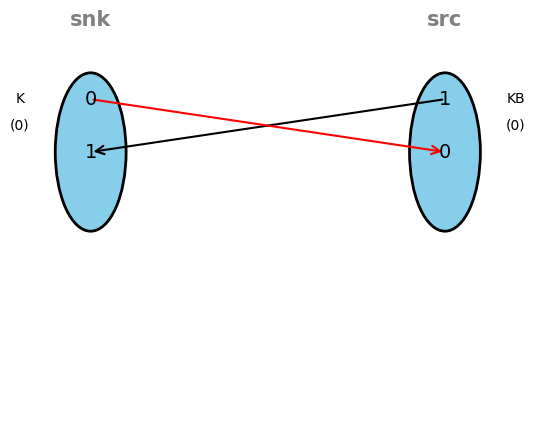

In [11]:
O1 = Kaon('+')
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/K+K+B.hdf5')
for diagram in Result:
    diagram.bulavision()

In [55]:
# <Corr>{kaon P=(0,0,0) A1u_1 SS_0} {kaon P=(0,0,0) A1u_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(5):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-5.3132+1.2375e-10j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (5.313235228930698-1.2374852501766988e-10j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.3134+

In [56]:
correct_results = [5.313235228930697-1.2374852500411735e-10j, 0.3133572739538783-4.988096974483457e-05j, 0.03609650510588132+6.839565236897468e-06j,
                  0.004810827480657285-6.399942130230121e-07j,0.0006508455450624747-3.150678487208817e-06j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(-8.881784197001252e-16+1.3552527156068805e-20j)
(-5.551115123125783e-17+1.4826464708739273e-17j)
(-6.938893903907228e-18-1.3044307387716225e-18j)
-3.049318610115481e-20j
-1.6940658945086007e-21j
True
True
True
True
True


### Kaon (II)

In [57]:
# <Corr>{kaon P=(0,0,1) A2_1 SS_1}  {kaon P=(0,0,1) A2_1 SS_1}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2_1', Displacement = 'SS_1')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,1), LGIrrep = 'A2_1', Displacement = 'SS_1')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.4917+1.5147e-11j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (0.49170001735473945-1.5147355185473124e-11j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.010

In [58]:
correct_results = [0.4917000173547394-1.5147355808889373e-11j, 0.010757429734652414+0.002969804584046444j, 0.0007009890811380045+0.0001437055144395958j,
                  0.00012234691581427997+0.0001378371121389662j, 1.0880171685894247e-05+1.1880906853283298e-05j,
                   2.554982966206718e-06+7.397305852454038e-07j,3.548861749885612e-08+2.028180053069103e-07j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(-5.551115123125783e-17-6.2341624917916505e-19j)
4.336808689942018e-19j
-8.131516293641283e-20j
(-2.710505431213761e-20+2.710505431213761e-20j)
(-5.082197683525802e-21+3.3881317890172014e-21j)
(4.235164736271502e-22+0j)
(1.9852334701272664e-23+0j)
True
True
True
True
True
True
True


In [59]:
res[0]

(0.49170001735473945-1.5147355185473124e-11j)

In [25]:
res[0]

(0.49170001735473945-1.5147355185473124e-11j)

### Kaon (III)

In [60]:
# <Corr>{kaon P=(0,0,0) A1u_1 SS_0} {kaon P=(0,0,0) A1u_1 SD_1}</Corr>:
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
hadrons = [Hadron1, Hadron2]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(5.4851e-06+0.0177j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (-5.4850804787784325e-06-0.01773871949561849j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-1.200

In [61]:
correct_results = [-5.485080478789817e-06-0.01773871949561849j, 1.2004716972565874e-05-0.0010292024430821243j,
                  -4.9036749771123316e-05-0.00012062606532584394j, 1.8042991178069682e-06-1.2415030815877924e-05j,
                  -1.647752403418175e-06-1.5108203736068658e-06j, -2.533833425994433e-07-2.4602977091122804e-07j,
                  7.3440529730488375e-09-3.5151051239063066e-08j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(-1.1384122811097797e-17+0j)
(2.5478751053409354e-18-1.5178830414797062e-18j)
(-2.574980159653073e-19-2.981555974335137e-19j)
(5.929230630780102e-21-2.0328790734103208e-20j)
(-3.8116482626443515e-21+2.752857078576476e-21j)
(1.0587911840678754e-22+1.376428539288238e-21j)
(-7.196471329211341e-23-1.257314531080602e-22j)
True
True
True
True
True
True
True


### Kaon (IV)

In [62]:
# <Corr>{kaon P=(0,0,0) A1u_1 SD_1} {kaon P=(0,0,0) A1u_1 SD_1}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
hadrons = [Hadron1, Hadron2]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(0.1800-4.3018e-12j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (-0.1799532020590296+4.3018227868785175e-12j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-4.7362

In [63]:
correct_results = [-0.17995320205903043+4.301835363623718e-12j,4.736206549745513e-05+1.0788939367028247e-06j,
                   4.916165496289272e-06-3.212047527632545e-07j,5.800200199421669e-07+5.987670769104738e-08j,
                   3.41753249823348e-08-5.698025704292855e-09j, 2.158584017211272e-08-3.208260915533398e-09j,
                   7.348582635936443e-09+2.435616111205428e-09j]
for i in range(len(res)):
    print(correct_results[i] - res[i])


for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(-8.326672684688674e-16+1.2576745200831851e-17j)
(-2.1141942363467336e-18-1.4941661189565858e-18j)
(-4.0657581468206416e-20-1.6517142471458857e-20j)
(5.505714157152952e-21-1.418780186650953e-20j)
(6.0218748593860415e-22-2.9182932010870816e-21j)
(-4.433688083284228e-22+5.790264287871194e-23j)
(-1.1580528575742387e-22+6.948317145445432e-23j)
True
True
True
True
True
True
True


### Kaon (V)

In [64]:
#<Corr>{kaon P=(0,0,0) A1u_1 SD_1} {kaon P=(0,0,0) A1u_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SD_1')
Hadron2 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'kaon_su',
          Momentum = (0,0,0), LGIrrep = 'A1u_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]


complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/K+K+B.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(5.4851e-06-0.0177j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (-5.485083416561587e-06+0.017738719494438338j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.000

In [65]:
correct_results = [-5.48508341652711e-06+0.01773871949443836j, 0.000255975402372115+0.0007132377278121097j,
                  1.4913873046250119e-05+0.00011228909346855395j, -1.5952375927729903e-05+1.9478611410040054e-05j,
                  -1.3983790034077655e-06+2.446921196986814e-06j, 3.1604899264361626e-07+3.8513400770803673e-07j,
                  -1.1400610785546163e-08+5.296440773137943e-08j]
for i in range(len(res)):
    print(correct_results[i] - res[i])


for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(3.447762908503904e-17+2.0816681711721685e-17j)
(-3.2526065174565133e-19-1.0842021724855044e-19j)
(-5.421010862427522e-20-1.3552527156068805e-19j)
(2.0328790734103208e-20+3.3881317890172014e-21j)
(1.4823076576950256e-21+2.541098841762901e-21j)
(-5.293955920339377e-23+7.940933880509066e-22j)
(6.617444900424222e-24+1.7205356741102976e-22j)
True
True
True
True
True
True
True


### Nucleon (I)

In [66]:
#<Corr>{nucleon P=(0,0,0) G1g_1 SS_0} {nucleon P=(0,0,0) G1g_1 SS_0}</Corr> 
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0', dlen='dlen0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.0002-7.2393e-08j, dtype=torch.complex128))], [np.int64(-2)])
Correlator_0 = (0.0003014282195708703+1.4478640785372494e-07j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-2.1

In [67]:
correct_results = [0.0003014282195708719+1.4478640785371858e-07j, 4.284943031770383e-06+1.5498840936793988e-06j,
                  1.4422620984853958e-07-4.5033456557986815e-08j, 2.6513636626996723e-09-2.7247473235876045e-09j,
                  4.846041404226831e-11-2.9327588702431805e-11j, 1.5809896198140648e-12-1.6502696227215908e-12j,
                   -1.3871318870420694e-14+2.122202737228897e-14j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = correct_results[i] - res[i]
    if np.abs(tst.imag) > 1e-12 or np.abs(tst.real) > 1e-12:
        print(False)
    else:
        print(True)

(1.6263032587282567e-18-6.3527471044072525e-21j)
7.877406409464993e-20j
(-7.940933880509066e-23-8.007108329513308e-22j)
(2.895132143935597e-24+6.617444900424222e-24j)
(-3.101927297073854e-25-6.656218991637645e-25j)
(7.270142102516845e-27-2.5647445750545536e-26j)
(-8.283039504820624e-28-2.4296915880807164e-28j)
True
True
True
True
True
True
True


### Nucleon (II)

In [68]:
#<Corr>{nucleon P=(0,0,0) G1g_2 SS_0} {nucleon P=(0,0,0) G1g_2 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0', dlen='dlen0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.0002+8.7245e-08j, dtype=torch.complex128))], [np.int64(-2)])
Correlator_0 = (0.0003003978719503038-1.74490032014805e-07j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-2.115

In [69]:
correct_results = [0.00030039787195030546-1.744900320148103e-07j, 4.230408254585984e-06+1.509849509210354e-06j,
                  1.402111854452368e-07-4.7661673187297724e-08j, 2.525481797910427e-09-2.6385986341764356e-09j,
                  3.7646453223177984e-11-2.8278297060512957e-11j, 1.6563771294195345e-12-1.4170101385674218e-12j,
                  -2.0993899502750057e-14+1.9596491324918984e-14j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = correct_results[i] - res[i]
    if np.abs(tst.imag) > 1e-15 or np.abs(tst.real) > 1e-15:
        print(False)
    else:
        print(True)

(1.6805133673525319e-18-5.293955920339377e-21j)
(8.470329472543003e-22+7.750351467376848e-20j)
(-1.3234889800848443e-22-7.940933880509066e-22j)
(2.895132143935597e-24+6.617444900424222e-24j)
(-3.4896682092080855e-25-5.00832011506716e-25j)
(8.077935669463161e-27-2.3224065049706588e-26j)
(-8.172598978089682e-28-4.67005655890839e-28j)
True
True
True
True
True
True
True


### Lambda (I)

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd', 's']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Obtain propagators for the s quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
3 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

 0 diagrams have been reduced
To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  1
Topology: 
[[[1, 0, 0], [0, 0, 0]], [[1, 0, 1], [0, 0, 1]], [[1, 0, 2], [0, 0, 2]]]


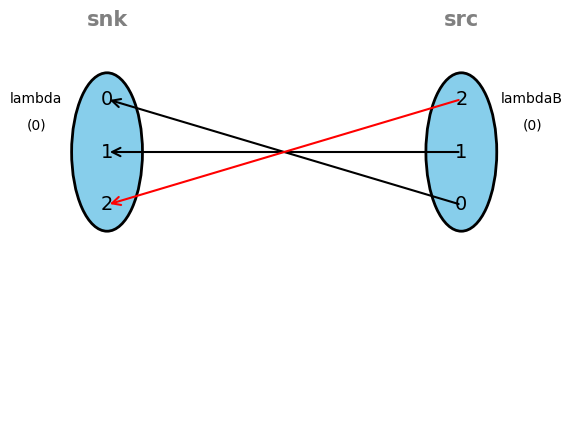

In [27]:
O1 = Lambda(0)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/L0L0.hdf5')
for diagram in Result:
    diagram.bulavision()

In [70]:
#<Corr>{lambda P=(0,0,1) G2_1 SS_0} {lambda P=(0,0,1) G2_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SS_0', dlen='dlen0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128)
res = []
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/L0L0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-3.0778e-05+2.7807e-09j, dtype=torch.complex128))], [np.int64(1)])
Correlator_0 = (-3.077753186553501e-05+2.7807329548038906e-09j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(

In [71]:
correct_results = [-3.077753186553501e-05+2.7807329548041602e-09j, 9.12736477548813e-09-4.1764274918236207e-10j,
                  2.7160280351221543e-10-3.238324688617527e-10j, 6.876717886410605e-12-8.175758060480078e-12j,
                  -2.939490924514951e-14+6.506758142108084e-14j, -7.518908585422305e-15-5.584906587482788e-15j,
                  5.136559547125595e-16+3.3689353299549526e-16j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

2.69660879692287e-22j
-1.550963648536927e-25j
(-1.0339757656912846e-25+1.0339757656912846e-25j)
(1.6155871338926322e-27+0j)
(-1.262177448353619e-29+0j)
(1.5777218104420236e-30-7.888609052210118e-31j)
-9.860761315262648e-32j
True
True
True
True
True
True
True


### Lambda (II)

In [72]:
#<Corr>{lambda P=(0,0,1) G2_1 SD_12} {lambda P=(0,0,1) G2_1 SS_0}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SD_12', dlen='dlen1')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SS_0', dlen='dlen0')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
import time
start = time.time()
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/L0L0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
end = time.time()
print(f'Required_Time = {100 * (end - start)} ms')

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(1.4533e-08+1.9846e-07j, dtype=torch.complex128))], [np.int64(1)])
Correlator_0 = (1.4533169771377089e-08+1.9846226309445597e-07j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-

In [73]:
# Naive Time: 6.9 ms
# Stacked_Time: 3.3 ms
# Super_StackedTime: 2.3107290267944336 ms
correct_results = [1.4533169771377099e-08+1.9846226309445597e-07j, -4.489387156951679e-10+6.686084334939451e-09j,
                  9.687107204435481e-12+1.0437245470148878e-10j, 6.329673156004688e-12-1.655022415807599e-12j,
                  1.786266652335234e-13-1.8146430381357077e-14j, 7.411371889809892e-15-1.409273270688939e-14j,
                  3.3472055797573277e-16-3.448345273168473e-16j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(9.926167350636332e-24+0j)
(1.550963648536927e-25+4.963083675318166e-24j)
(1.5994312625537059e-25+4.006656092053728e-25j)
(1.2924697071141057e-26-4.8467614016778965e-27j)
(-2.524354896707238e-28-1.0412963948917356e-28j)
(1.5777218104420236e-29-1.262177448353619e-29j)
(2.9582283945787943e-31+5.9164567891575885e-31j)
True
True
True
True
True
True
True


### Lambda (III)

In [74]:
#<Corr>{lambda P=(0,0,1) G2_1 SD_12} {lambda P=(0,0,1) G2_1 SD_12}</Corr>
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SD_12', dlen='dlen1')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'lambda_uds',
          Momentum = (0,0,1), LGIrrep = 'G2_1', Displacement = 'SD_12', dlen='dlen1')
hadrons = [Hadron1, Hadron2]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_ud_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulators_strange = PyTor_Perambulator(Path_Perambulator = 'JohnData/data/perambs_s_1.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': perambulators_strange, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'JohnData/data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'JohnData/data/mode_triplets_1_N.hdf5', Device = device, cplx128 = complex128,
                                     Use_Triplet_Identity=True)
res = []
import time
start = time.time()
for t in range(7):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/L0L0.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res.append(test0_contracted)
end = time.time()
print(f'Required Time = {100 * (end - start)} ms')

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(1.1251e-05-1.2725e-09j, dtype=torch.complex128))], [np.int64(1)])
Correlator_0 = (1.125077184223075e-05-1.272545153909817e-09j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(1.9

In [75]:
# Naive Time: 28.7 ms
# Stacked_Time: 13.9 ms
# Super_Stacked_Time: 7.3806047439575195 ms
correct_results = [1.1250771842230787e-05-1.2725451539131117e-09j, 1.9997680734186264e-07+3.364074983744315e-08j,
                  7.624568099318903e-10+4.292937901592418e-10j, -1.466024606710914e-11-5.607324966878773e-11j,
                  8.706009241463271e-13-1.7835767907929031e-12j, -1.4792132213798587e-13-2.88898170068082e-13j,
                  -4.2507422263273726e-15-5.184910676747679e-15j]
for i in range(len(res)):
    print(correct_results[i] - res[i])

for i in range(len(res)):
    tst = res[i]-correct_results[i]
    if np.abs(tst.imag) >= 1e-13 or np.abs(tst.real) >= 1e-13:
        print(False)
    else:
        print(True)

(3.7269449679189215e-20-3.2946603797987092e-21j)
(9.529120656610879e-22+5.823351512373315e-22j)
(-2.481541837659083e-23+3.308722450212111e-24j)
(-6.72084247699335e-25-3.618915179919496e-25j)
(-6.058451752097371e-27+4.4428646182047385e-27j)
(-1.0097419586828951e-28-7.068193710780266e-28j)
(-3.6287601640166543e-29-3.1554436208840472e-30j)
True
True
True
True
True
True
True


## Testing Using Known Results

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
0 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -1
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


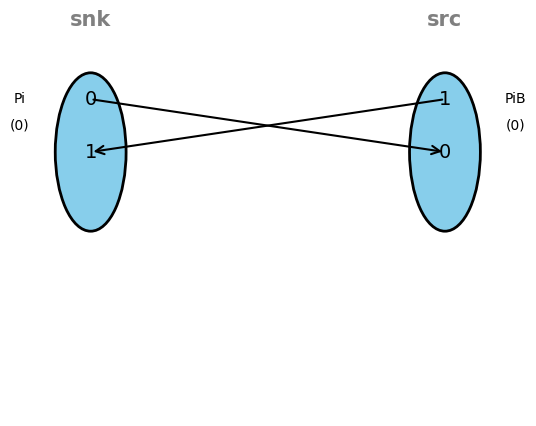

In [2]:
O1 = Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/Pi+Pi+.hdf5')
for diagram in Result:
    diagram.bulavision()

In [76]:
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
res1 = []
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+Pi+.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
    res1.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-4.2801+2.0336e-10j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (4.280143659103805-2.0335842621235685e-10j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.1989-5.9557e-18j, dtype=torch.complex128))], [np.int64(-1)]

In [78]:
pion = [0 for i in range(9)]
pion[0] = (4.280143667070952-1.6350227456098284e-10j)
pion[1] = (0.19890361370339574+2.0411337069269912e-19j)
pion[2] = (0.018045616035938555-9.287810014024311e-21j)
pion[3] = (0.0018946498116805485-1.1890622859063506e-20j)
pion[4] = (0.00020157319714492162-1.1739847651772713e-24j)
pion[5] = (1.8042330243095597e-05-6.394253214143184e-23j)
pion[6] = (2.2887691463923263e-06-3.339507463452103e-24j)
pion[7] = (3.0520964074138293e-07-4.321697482287652e-24j)
pion[8] = (1.3201802790095467e-07-2.0338252452333878e-25j)

for i in range(len(res1)):
    print(f'pion({i}) = {res1[i]}')
    print(f'diff    = {res1[i]-pion[i]}')
    print('______')

for i in range(len(res1)):
    tst = res1[i]-pion[i]
    if np.abs(tst.imag) >= 1e-8 or np.abs(tst.real) >= 1e-8:
        print(False)
    else:
        print(True)

pion(0) = (4.280143659103805-2.0335842621235685e-10j)
diff    = (-7.96714694217826e-09-3.985615165137401e-11j)
______
pion(1) = (0.19890361519986793+5.9556900700558906e-18j)
diff    = (1.4964721961607808e-09+5.7515766993631915e-18j)
______
pion(2) = (0.018045615971228224-2.061409104147945e-19j)
diff    = (-6.471033084376465e-11-1.968531004007702e-19j)
______
pion(3) = (0.0018946497969563178-7.56519469120046e-22j)
diff    = (-1.472423073224649e-11+1.113410338994346e-20j)
______
pion(4) = (0.0002015731975934616-9.932766255417101e-22j)
diff    = (4.4853996818833286e-13-9.92102640776533e-22j)
______
pion(5) = (1.8042330371594073e-05+1.9704960072874202e-22j)
diff    = (1.2849847596564656e-13+2.609921328701739e-22j)
______
pion(6) = (2.2887691526249904e-06-1.6323807595139323e-24j)
diff    = (6.232664090507958e-15+1.7071267039381707e-24j)
______
pion(7) = (3.0520963776555407e-07-4.679074387087902e-24j)
diff    = (-2.9758288669413956e-15-3.573769048002501e-25j)
______
pion(8) = (1.320180285209

In [79]:
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m_1', Displacement = 'SS_1')
Hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m_1', Displacement = 'SS_1')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
res1 = []
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+Pi+.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
    res1.append(test0_contracted)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.3968+3.2661e-11j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (0.3968112586609802-3.266083367639756e-11j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.0069-0.0019j, dtype=torch.complex128))], [np.int64(-1)])
Co

In [80]:
pion = [0 for i in range(9)]
pion[0] = (0.39681125942845186-2.4863527388211196e-11j)
pion[1] = (0.006854588941944439+0.0018739050089830213j)
pion[2] = (0.00035147845393663704+7.051514602640161e-05j)
pion[3] = (4.853857783263503e-05+5.5342007300572974e-05j)
pion[4] = (3.512518353425199e-06+3.784624963843414e-06j)
pion[5] = (6.305396259865426e-07+1.6889171994483086e-07j)
pion[6] = (6.545752107319039e-09+4.143195530282928e-08j)
pion[7] = (6.449180817163239e-10+2.1060350468251335e-09j)
pion[8] = (1.2538175809018842e-09-1.1807728582266968e-10j)

for i in range(len(res1)):
    print(f'pion({i}) = {res1[i]}')
    print(f'diff    = {res1[i]-pion[i]}')
    print('______')


for i in range(len(res1)):
    tst = res1[i]-pion[i]
    if np.abs(tst.imag) > 1e-9 or np.abs(tst.real) > 1e-9:
        print(False)
    else:
        print(True)

pion(0) = (0.3968112586609802-3.266083367639756e-11j)
diff    = (-7.674716417938043e-10-7.797306288186362e-12j)
______
pion(1) = (0.006854588966852254+0.0018739049724863142j)
diff    = (2.4907814526187178e-11-3.649670713215536e-11j)
______
pion(2) = (0.0003514784430399821+7.051514948234782e-05j)
diff    = (-1.0896654943377132e-11+3.4559462090038087e-12j)
______
pion(3) = (4.853857787821045e-05+5.5342006735636164e-05j)
diff    = (4.5575420878646994e-14-5.649368098976579e-13j)
______
pion(4) = (3.512518453821349e-06+3.7846249468333477e-06j)
diff    = (1.0039615004888368e-13-1.701006651884992e-14j)
______
pion(5) = (6.305396287180964e-07+1.6889173237342677e-07j)
diff    = (2.7315538823156752e-15+1.2428595909043963e-14j)
______
pion(6) = (6.545752003225722e-09+4.1431954768549245e-08j)
diff    = (-1.0409331652798559e-16-5.342800339940592e-16j)
______
pion(7) = (6.449179896016223e-10+2.1060350245599668e-09j)
diff    = (-9.211470159558534e-17-2.226516678135003e-17j)
______
pion(8) = (1.253817

## Testing Using Miguels Results

In total there are 4 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['d']
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
****** Obtain Diagrams for Correlator 2 ******
We have following flavors ['d', 'u']
Obtain propagators for the d quarks...
Done.
Obtain propagators for the u quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
****** Obtain Diagrams for Correlator 3 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redunda

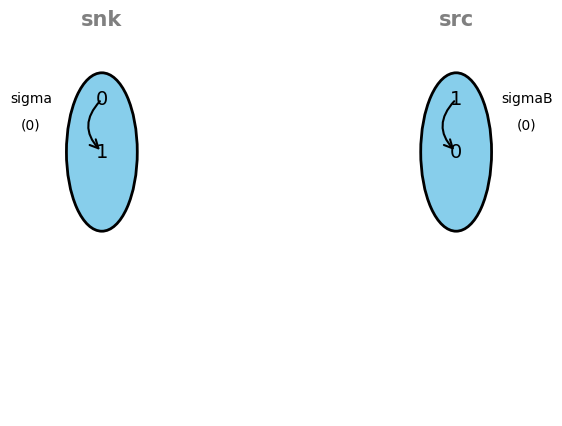

numerical factor =  -0.9999999999999998
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


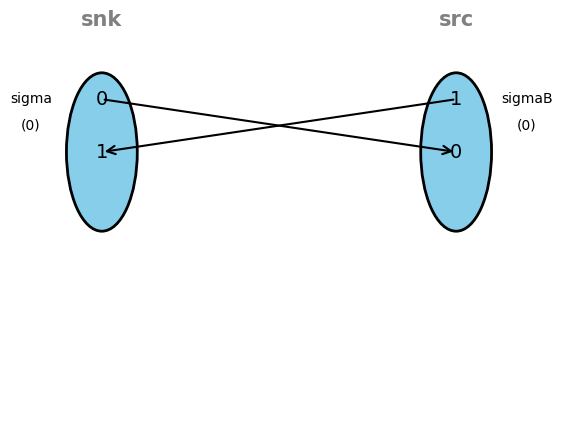

In [8]:
O1 = sigma(0)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/SigmaSigmaB.hdf5')
for diagram in Result:
    diagram.bulavision()

In [81]:
Hadron1 = Hadron(File_Info_Path='M_Tests/meson_operators.h5', Hadron_Type='meson_operators', Hadron_Position=(1, 0), 
                 Flavor='isoscalar', Momentum=[0, 0, 0], LGIrrep='A1gp_1', Displacement='SS_0')
Hadron2 = Hadron(File_Info_Path='M_Tests/meson_operators.h5', Hadron_Type='meson_operators', Hadron_Position=(0, 0),
                 Flavor='isoscalar', Momentum=[0, 0, 0], LGIrrep='A1gp_1', Displacement='SS_0')

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['M_Tests/light_quark_perambulator_quda_5_More.hdf5', 
                                                              'M_Tests/light_quark_perambulator_quda_5.hdf5'], 
                                         Device = device, Double_Reading = True, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'M_Tests/mode_doublets_5.hdf5', Device = device, cplx128 = complex128)

Contractor = PyCorrTorch(SinkTime=4, SourceTime=0, Hadrons=[Hadron1, Hadron2], Path_Wicktract='DiagramsTests/SigmaSigmaB.hdf5')
Contracted = Contractor.TorchTractor(All_Perambulators=perambulator, ModeDoublets=modeDoublet)
Contracted-(39108.66379277315-5.5155943025067997e-11j)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 3 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
3 tensor contractions to be performed
([((((1, 0),), (0,)), tensor(140.8438-1.8981e-14j, dtype=torch.complex128)), ((((0, 0),), (0,)), tensor(138.7993-1.7703e-13j, dtype=torch.complex128)), ((((1, 0), (0, 0)), (1,)), tensor(-10.6130+2.0151e-14j, dtype=torch.complex128))], [np.float64(1.9999999999999996), np.float64(-0.9999999999999998)])
Correlator_0 = (39108.66379277315-5.515511035779953e-11j)


8.326672684688674e-16j

In [82]:
Hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
hadrons = [Hadron3, Hadron4]

complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['M_Tests/light_quark_perambulator_quda_5.hdf5'], 
                                         Device = device, Double_Reading = True, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'M_Tests/mode_doublets_5.hdf5', Device = device, cplx128 = complex128)
test0            = PyCorrTorch(SinkTime = 4, SourceTime = 0, 
                               Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/Pi+Pi+.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
test0_contracted-(78.13719804676474-5.081876067246993e-16j)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-78.1372+8.9772e-17j, dtype=torch.complex128))], [np.int64(-1)])
Correlator_0 = (78.13719804676475-8.977193988179977e-17j)


(1.4210854715202004e-14+4.1841566684289957e-16j)

## Testing Using identites from Colin's Book

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
**********************************************
 
 
********
3 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

Diagram 1 has been added to diagram 0
 1 diagrams have been reduced
To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -2
Topology: 
[[[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 0, 0]], [[1, 0, 2], [0, 0, 2]]]


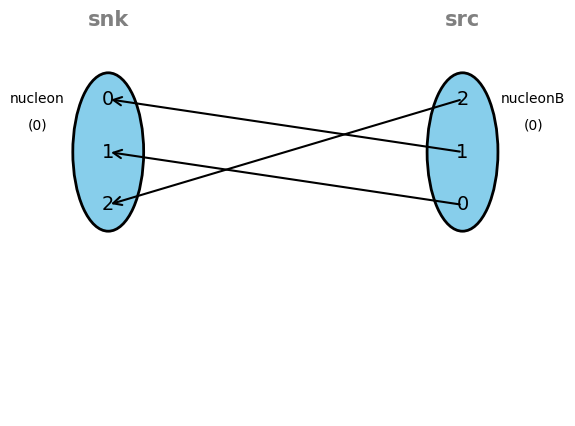

In [2]:
O1 = Nucleon(1/2)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'DiagramsTests/NN.hdf5')
tcmpr = []
for res in Result:
    a = res.bulavision()
    tcmpr.append(np.array(a))

In [83]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet_old         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
modeTriplet = {}
for i in range(9):
    new_name = 'px0_py0_pz0_ddir0_t'+str(i)
    modeTriplet[new_name] = modeTriplet_old[f'px0_py0_pz0_ddir0_dlen0_t{str(i)}']



Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
res1 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res1.append(test0_contracted)









Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'DiagramsTests/NN.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res2.append(test0_contracted)




final_res = []

if len(res1) != len(res2):
    raise TypeError('Error!')
else:
    for i in range(len(res1)):
        res_i = (res1[i] + res2[i]) / 2
        final_res.append(res_i)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-0.0002-7.2393e-08j, dtype=torch.complex128))], [np.int64(-2)])
Correlator_0 = (0.00030142821957086996+1.447864078537269e-07j)
______
Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
([((((1, 0), (0, 0)), (0,)), tensor(-2.1425e-06-7.7494e-07j, dtype=torch.complex128))], [np.in

In [84]:
nucleon = [0 for i in range(9)]
for t in range(9):
    P = perambulators_light[f'srcTime0_snkTime{t}']
    Bso = modeTriplet['px0_py0_pz0_ddir0_t0']
    Bsi = modeTriplet[f'px0_py0_pz0_ddir0_t{t}']
    CN1 = torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[0,0],P[0,0], P[1,1]) - torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[0,0],P[0,1], P[1,0])
    CN2 = torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[1,1],P[0,0], P[1,1]) - torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[1,1],P[0,1], P[1,0])
    to_add = 3 * (CN1.item()+CN2.item())/2
    nucleon[t] = to_add

In [85]:
for i in range(len(final_res)):
    print(f'nucleon({i}) = {final_res[i].real }')
    print(f'diff    = {final_res[i].real-nucleon[i].real}')
    print('______')


for i in range(len(res1)):
    tst = final_res[i]-nucleon[i]
    if np.abs(tst.imag) > 1e-15 or np.abs(tst.real) > 1e-15:
        print(False)
    else:
        print(True)

nucleon(0) = 0.0003009130457605867
diff    = 5.421010862427522e-20
______
nucleon(1) = 4.25767564317817e-06
diff    = -8.470329472543003e-22
______
nucleon(2) = 1.4221869764688798e-07
diff    = -2.6469779601696886e-23
______
nucleon(3) = 2.5884227303050576e-09
diff    = 0.0
______
nucleon(4) = 4.3053433632724e-11
diff    = 0.0
______
nucleon(5) = 1.618683374616788e-12
diff    = 2.0194839173657902e-28
______
nucleon(6) = -1.743260918658528e-14
diff    = 3.1554436208840472e-30
______
nucleon(7) = -1.117968776196914e-15
diff    = 0.0
______
nucleon(8) = 2.120394242632778e-17
diff    = 0.0
______
True
True
True
True
True
True
True
True
True
